<a href="https://colab.research.google.com/github/VJurczak/SiOC_lab/blob/main/Interpolacja_funkcji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

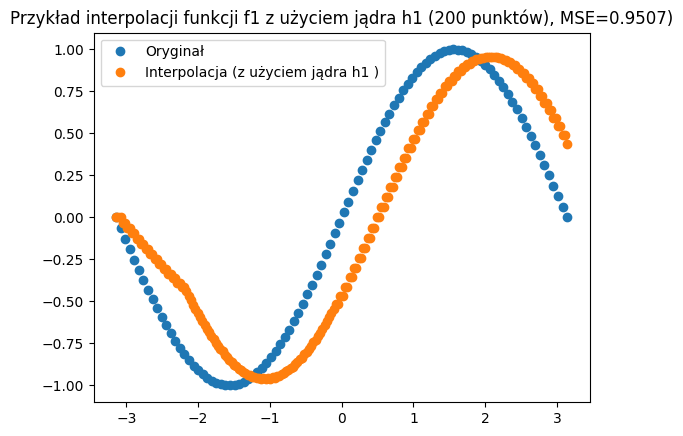

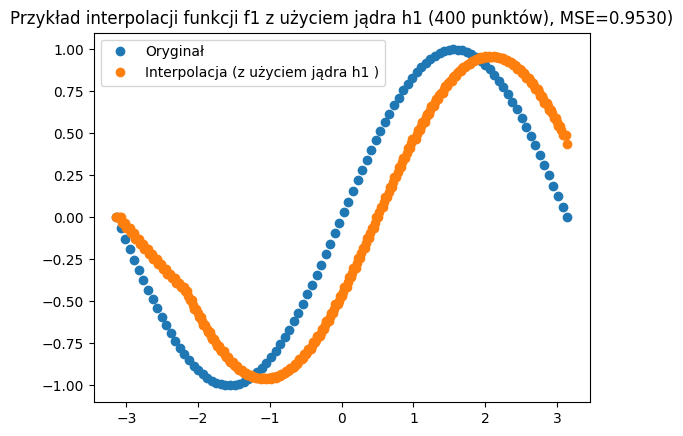

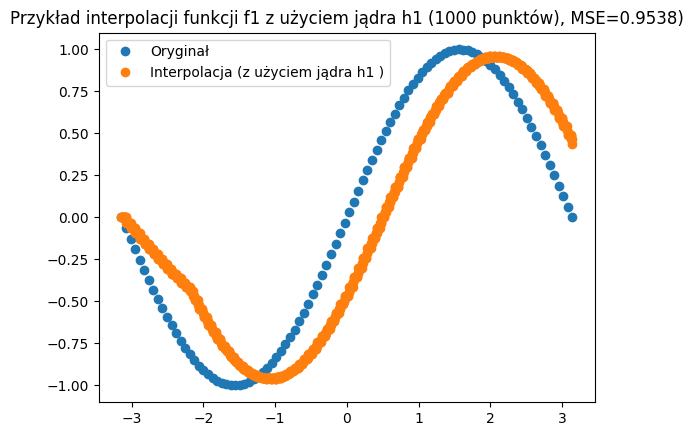

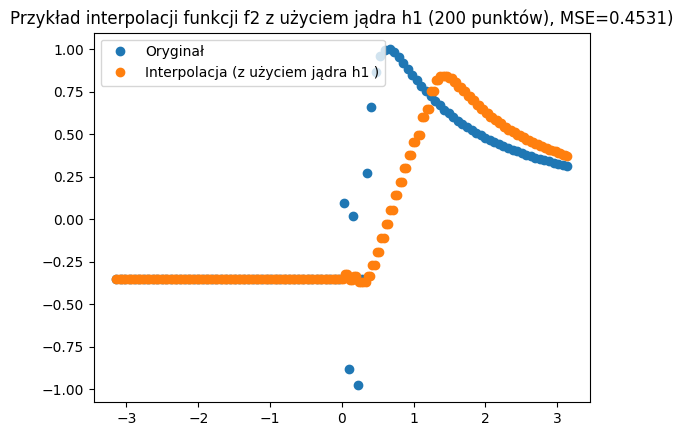

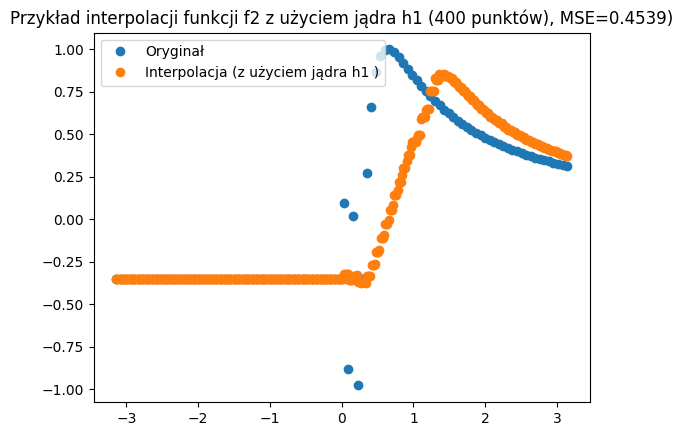

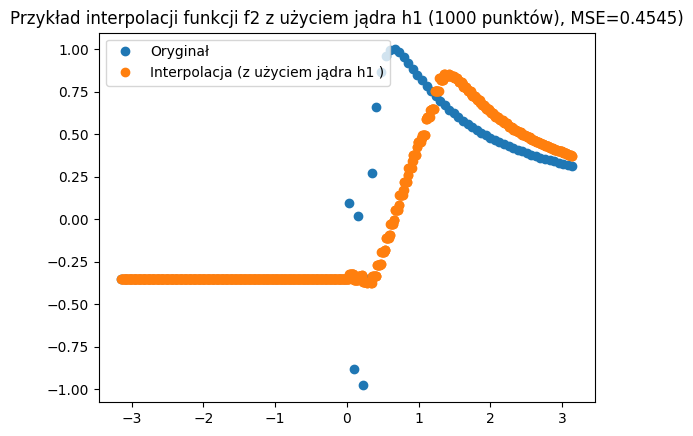

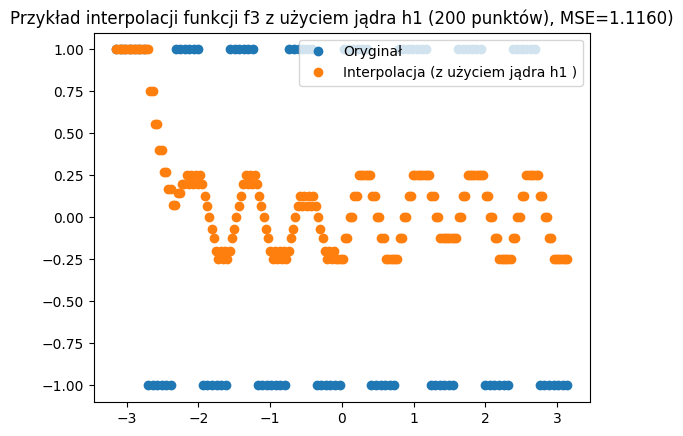

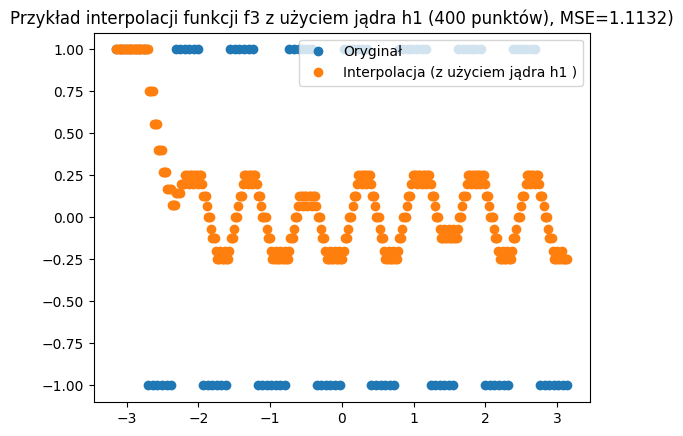

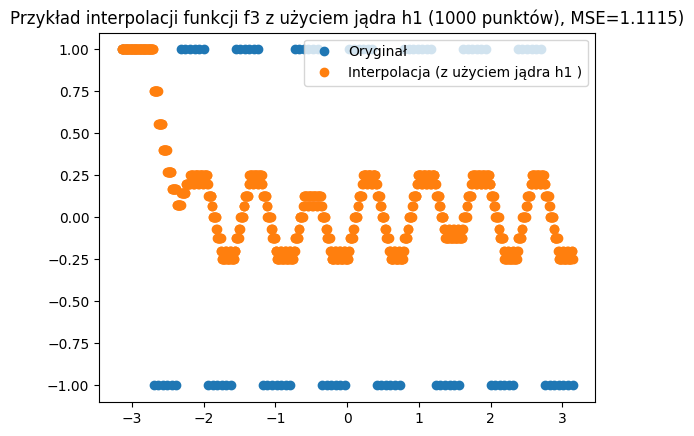

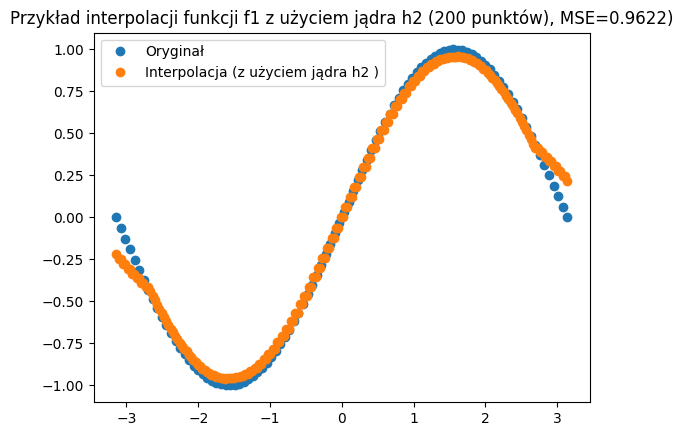

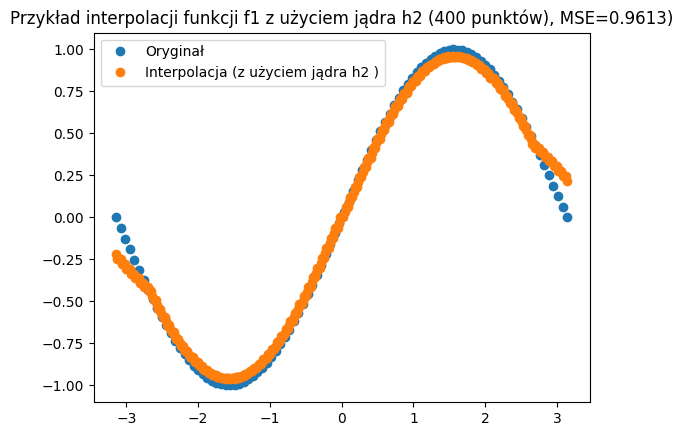

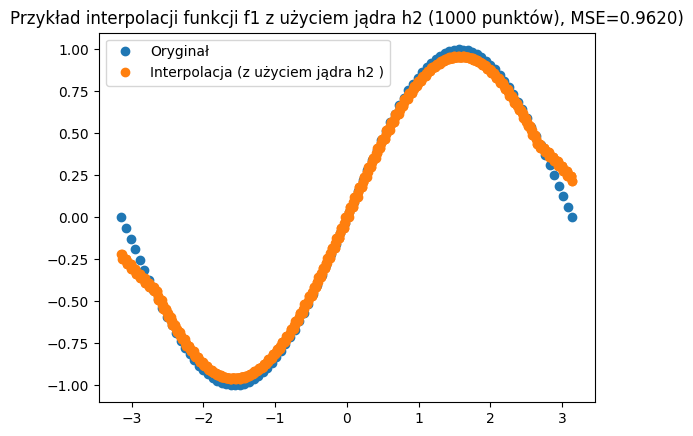

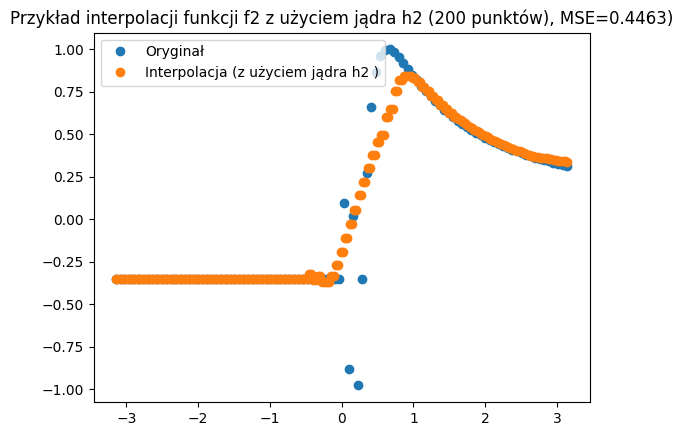

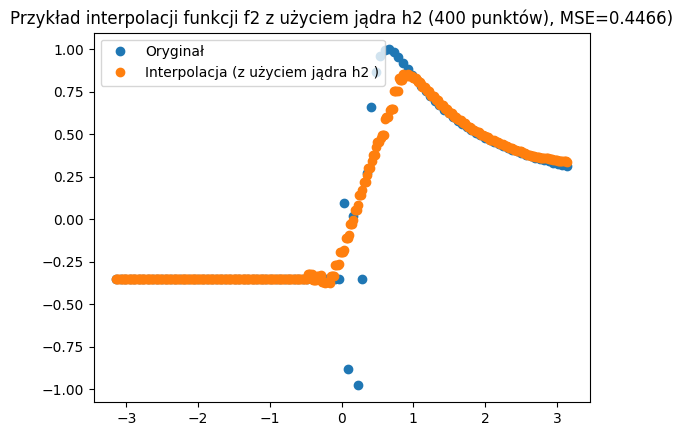

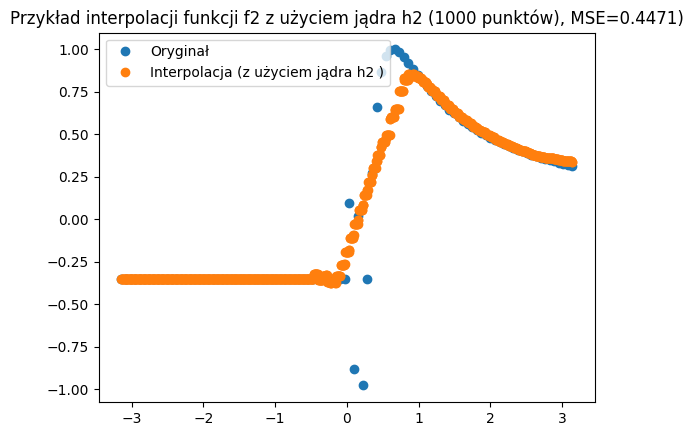

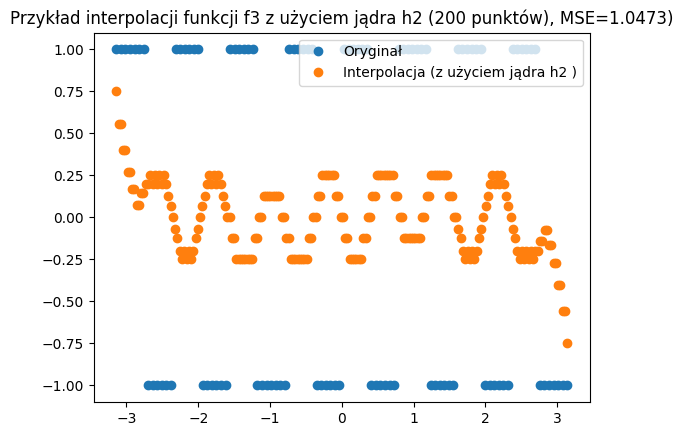

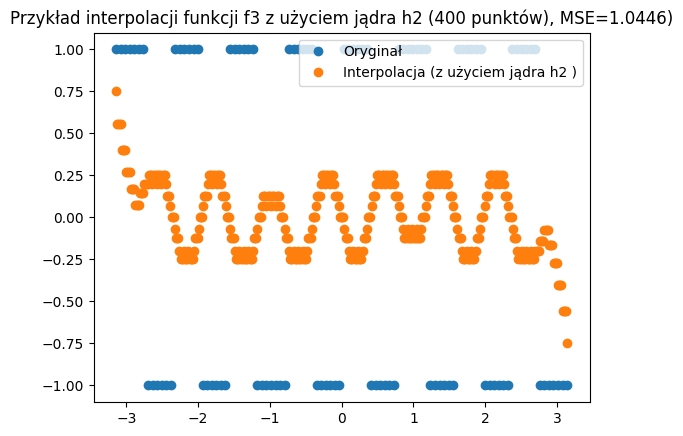

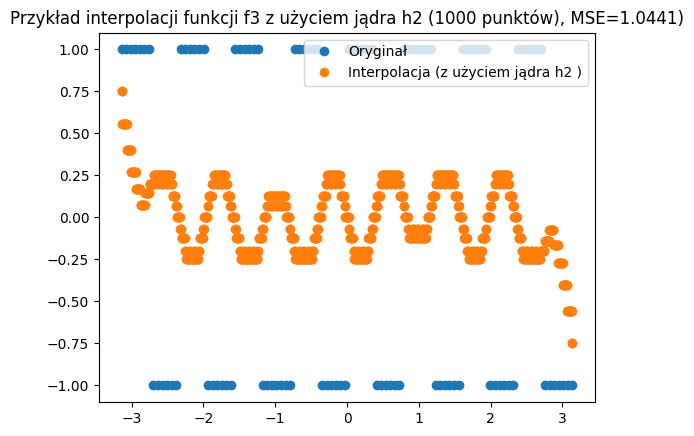

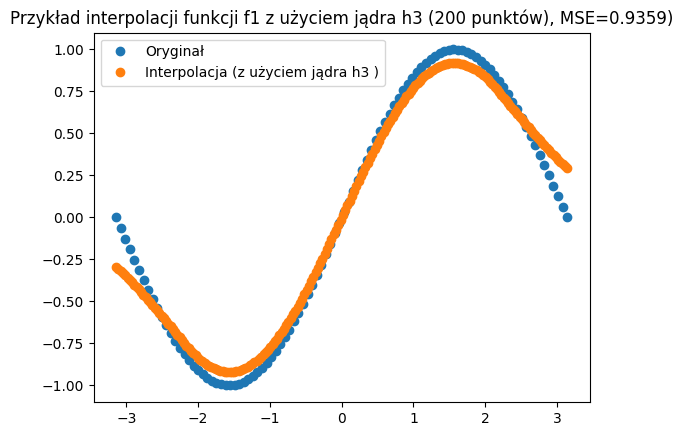

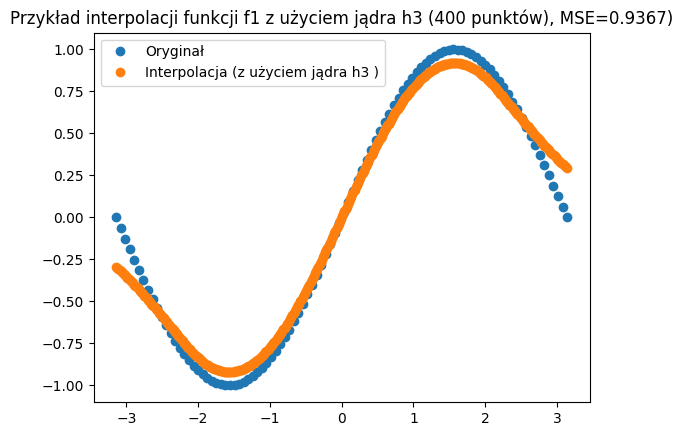

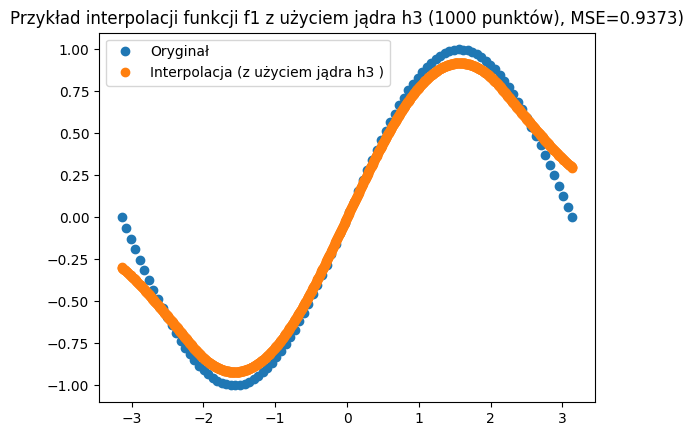

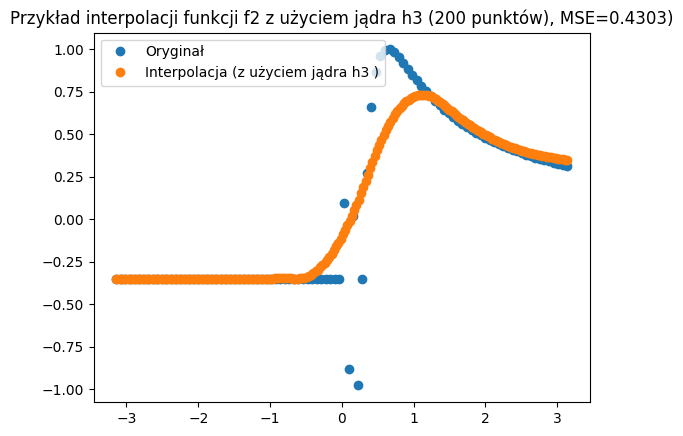

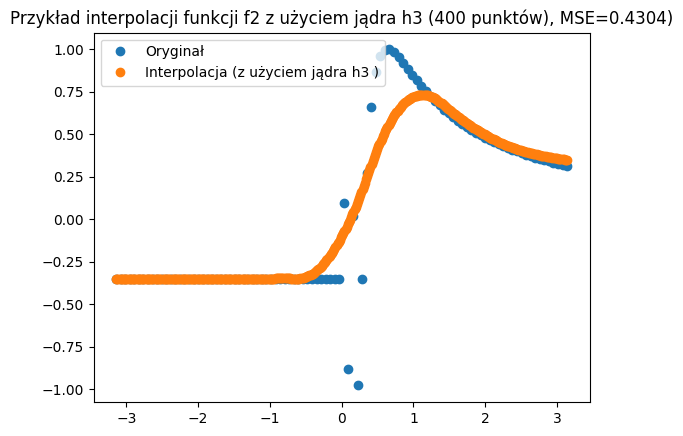

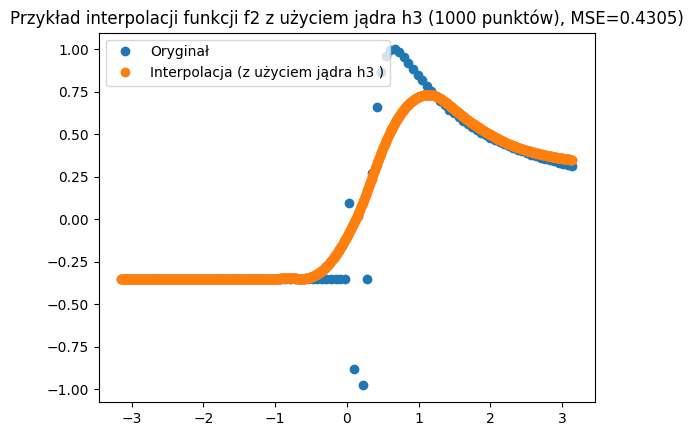

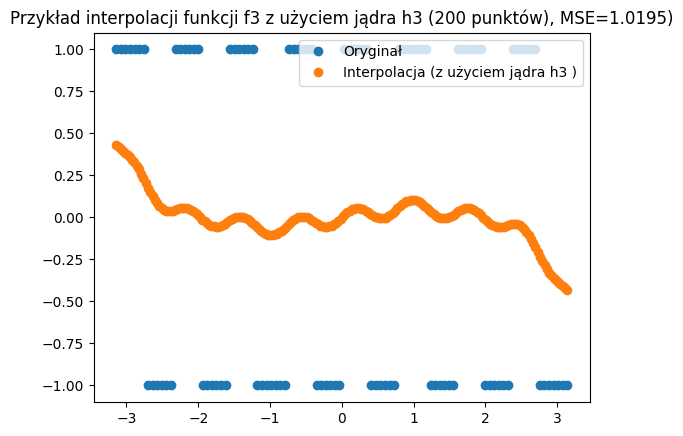

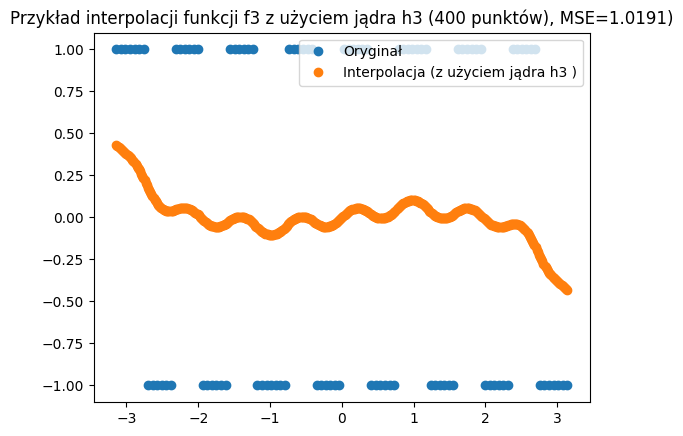

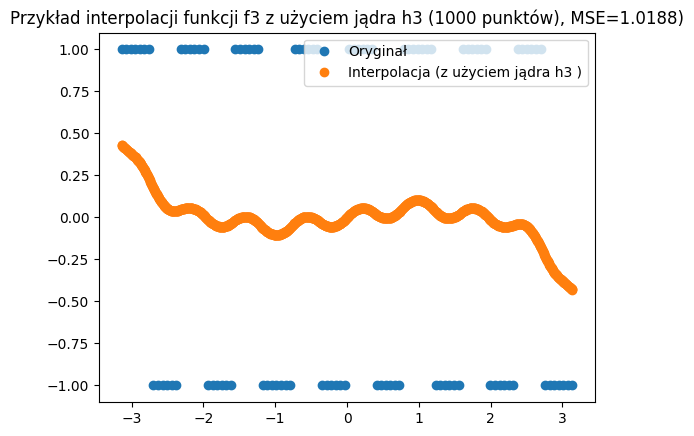

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve


import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import interpolate
from sklearn import metrics

from scipy.signal import convolve



def f1(x):
    return np.sin(x)

def f2(x):
    epsilon =1e-6
    x=np.clip(x,epsilon,None)
    return np.sin(1/x)

def f3(x):
    return np.sign(np.sin(8 * x))


def h1(x):
    return np.where((x >= 0) & (x <= 1), 1, 0)

def h2(x):
    return np.where((x >= -0.5) & (x <= 0.5), 1, 0)


def h3(x):
    return np.where((x >= -1) & (x <= 1), 1 - np.abs(x), 0)

N = 100

jadra = [h1,h2,h3]

funkcje = [f1,f2,f3]
liczba_punktow = [N*2,N*4,N*10]
x_original = np.linspace(-np.pi,np.pi, N)


for j in jadra:
  for func in funkcje:
    for n in liczba_punktow:


      plt.plot(x_original, func(x_original), 'o', label='Oryginał')
      x_interp = np.linspace(-np.pi, np.pi, n)


      kernel_values = j(x_interp[:, np.newaxis] - x_original)

      y_interp = np.sum(kernel_values * func(x_original),axis=1) / np.sum(kernel_values,axis=1)

      plt.plot(x_interp, y_interp, 'o', label=f'Interpolacja (z użyciem jądra {j.__name__} )')
      mse = np.mean((func(x_original) - y_interp[:, np.newaxis])**2)
      plt.legend()
      plt.title(f'Przykład interpolacji funkcji {func.__name__} z użyciem jądra {j.__name__} ({n} punktów), MSE={mse:.4f})')

      plt.show()